In [1]:
import pandas as pd
import numpy as np

In [2]:
#Reading the dataset
data = pd.read_csv("C:/Users/91976/Downloads/Zoo.csv")

In [3]:
data.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
data.shape

(101, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
#EDA
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [10]:
data.hair.value_counts()

0    58
1    43
Name: hair, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

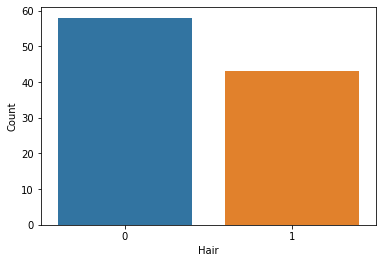

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'hair', data = data)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show

In [12]:
#Splitting the data
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:17]
Y = data.iloc[:,17]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [17]:
#Fitting the Knn model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [18]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = clf.predict(X_test)

In [23]:
#Accuracy
from sklearn.metrics import accuracy_score
scores =[]
score = accuracy_score(y_pred, Y_test)
scores.append(score)

In [24]:
#Cross validation score of K-nearest neighbors
from sklearn.model_selection import cross_val_score
score_knn = cross_val_score(clf, X, Y, cv = 10)

C:\Users\91976\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [25]:
print("Accuracy : %0.2f" % (score_knn.mean()))

Accuracy : 0.95
